In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the dataset
df = pd.read_csv('D:/HVAC Anomaly Detection/data/raw/HVAC_NE_EC_19-21.csv')

# Basic info
df.shape


(33888, 11)

In [2]:
# First few rows
df.head()



,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
0,2019-10-15 00:00:00+02:00,19.859999,20.469999,18.5,19.02,20.299999,71.110001,58.919998,79.5,0.0,0.0
1,2019-10-15 00:15:00+02:00,19.855000,20.430000,18.5,19.02,20.299999,71.320000,59.000000,82.0,0.0,0.0
2,2019-10-15 00:30:00+02:00,19.850000,20.410000,18.5,19.02,20.299999,71.470001,59.109997,79.5,0.0,0.0
3,2019-10-15 00:45:00+02:00,19.840000,20.379999,18.5,19.08,20.299999,71.439995,59.309998,77.0,0.0,0.0
4,2019-10-15 01:00:00+02:00,19.830000,20.350000,18.5,19.08,20.299999,71.580002,59.559998,79.5,0.0,0.0


In [3]:
# Data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888 entries, 0 to 33887
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     33888 non-null  object 
 1   T_Supply      33888 non-null  float64
 2   T_Return      33888 non-null  float64
 3   SP_Return     33888 non-null  float64
 4   T_Saturation  33888 non-null  float64
 5   T_Outdoor     33888 non-null  float64
 6   RH_Supply     33888 non-null  float64
 7   RH_Return     33888 non-null  float64
 8   RH_Outdoor    33888 non-null  float64
 9   Energy        33888 non-null  float64
 10  Power         33888 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.8+ MB


In [4]:
# Summary statistics
df.describe()


,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
count,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000,33888.000000
mean,20.436936,19.994425,22.302290,18.580051,12.414164,45.433972,37.251636,73.803308,5.769196,2.308225
std,3.535683,2.357756,0.745301,2.237516,4.925918,10.765867,11.253552,21.116373,6.074394,2.432835
min,12.264999,12.344999,18.500000,12.300000,2.300000,19.939999,11.730000,11.000000,0.000000,0.000000
25%,17.879999,18.389999,22.500000,17.260000,8.900000,37.709999,29.420000,60.000000,0.000000,0.000000
50%,19.785000,20.385000,22.500000,18.059999,11.800000,44.669998,36.230000,78.500000,0.000000,0.000000
75%,23.256249,21.699999,22.500000,20.180000,15.300000,51.180000,43.329998,93.000000,12.000000,4.980000
max,30.295000,25.990000,23.500000,26.400000,32.799999,84.699997,78.699997,100.000000,15.000000,5.316000


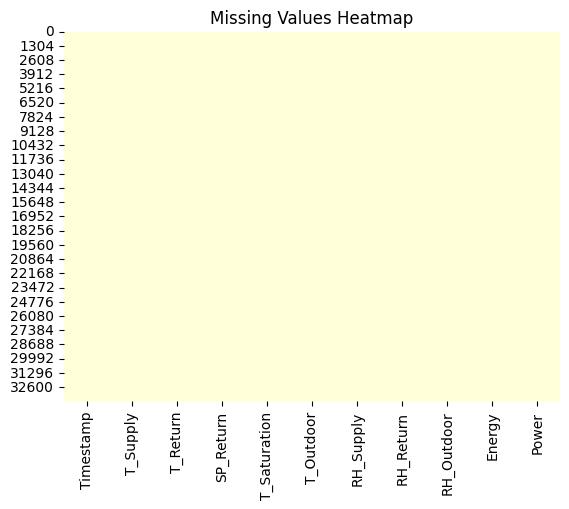

In [5]:
# Missing value heatmap
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
#  Count of missing values per column
missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

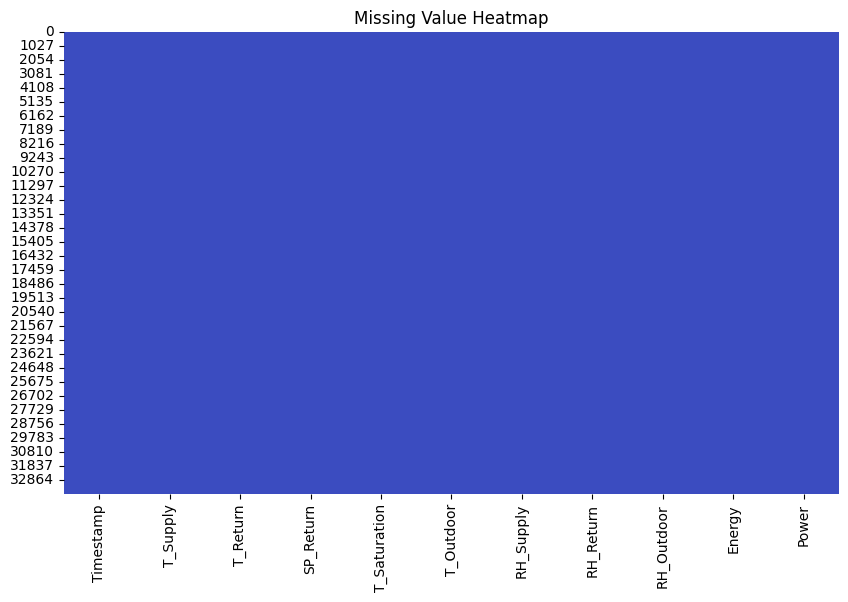

In [7]:
# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Value Heatmap")
plt.show()


In [8]:
# 📋 Columns in the dataset
df.columns


Index(['Timestamp', 'T_Supply', 'T_Return', 'SP_Return', 'T_Saturation',
       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor', 'Energy', 'Power'],
      dtype='object')

In [9]:
# 🔠 Non-numeric columns
df.select_dtypes(include=['object']).columns

# ✅ Unique values of categorical features
for col in df.select_dtypes(include=['object']):
    print(f"{col} : {df[col].nunique()} unique values")


Timestamp : 33888 unique values


In [10]:
# 🔁 Duplicated rows
df.duplicated().sum()


np.int64(0)

In [11]:
df = df.drop_duplicates()


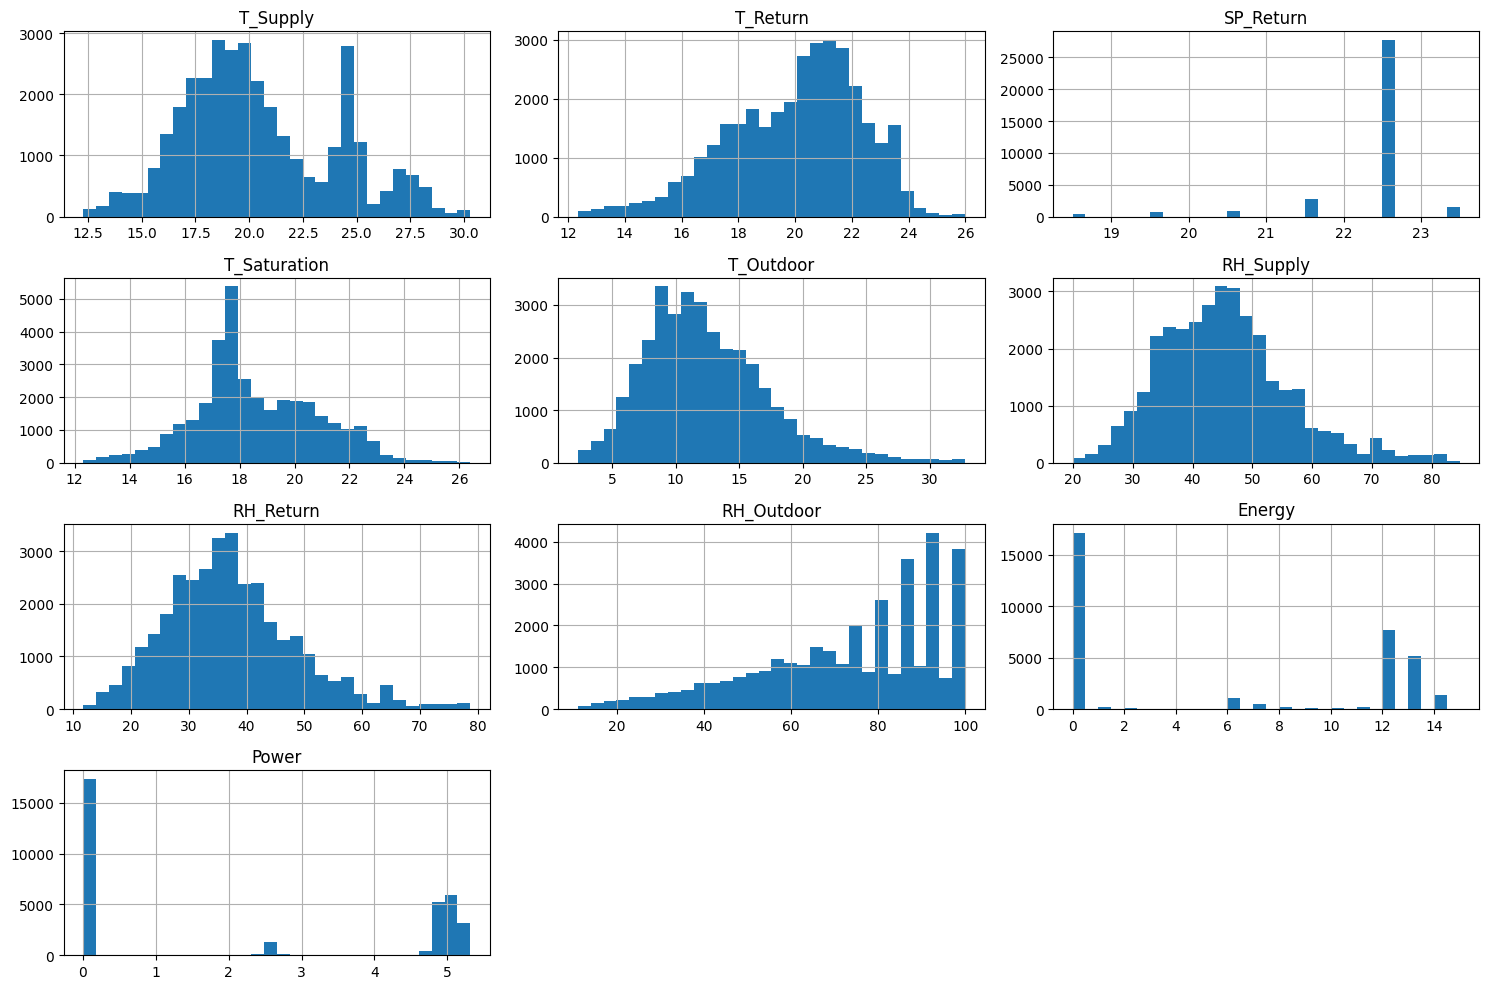

In [12]:
# Plotting histograms of all numeric features
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


## 🔍 Step 1: Data Overview
- Loaded dataset
- Explored number of rows/columns
- Checked data types and missing values

## 🧼 Step 2: Data Cleaning
- Detected and visualized missing values
- Checked for duplicate entries

## 📊 Step 3: Initial Visualization
- Explored distributions of key numerical features
- Identified outliers or anomalies visually


In [13]:
# Show missing values again
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

In [14]:
# Drop rows with missing values
df_cleaned = df.dropna()


In [15]:
print("Before fillna:", df.columns)


Before fillna: Index(['Timestamp', 'T_Supply', 'T_Return', 'SP_Return', 'T_Saturation',
       'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor', 'Energy', 'Power'],
      dtype='object')


In [16]:
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())


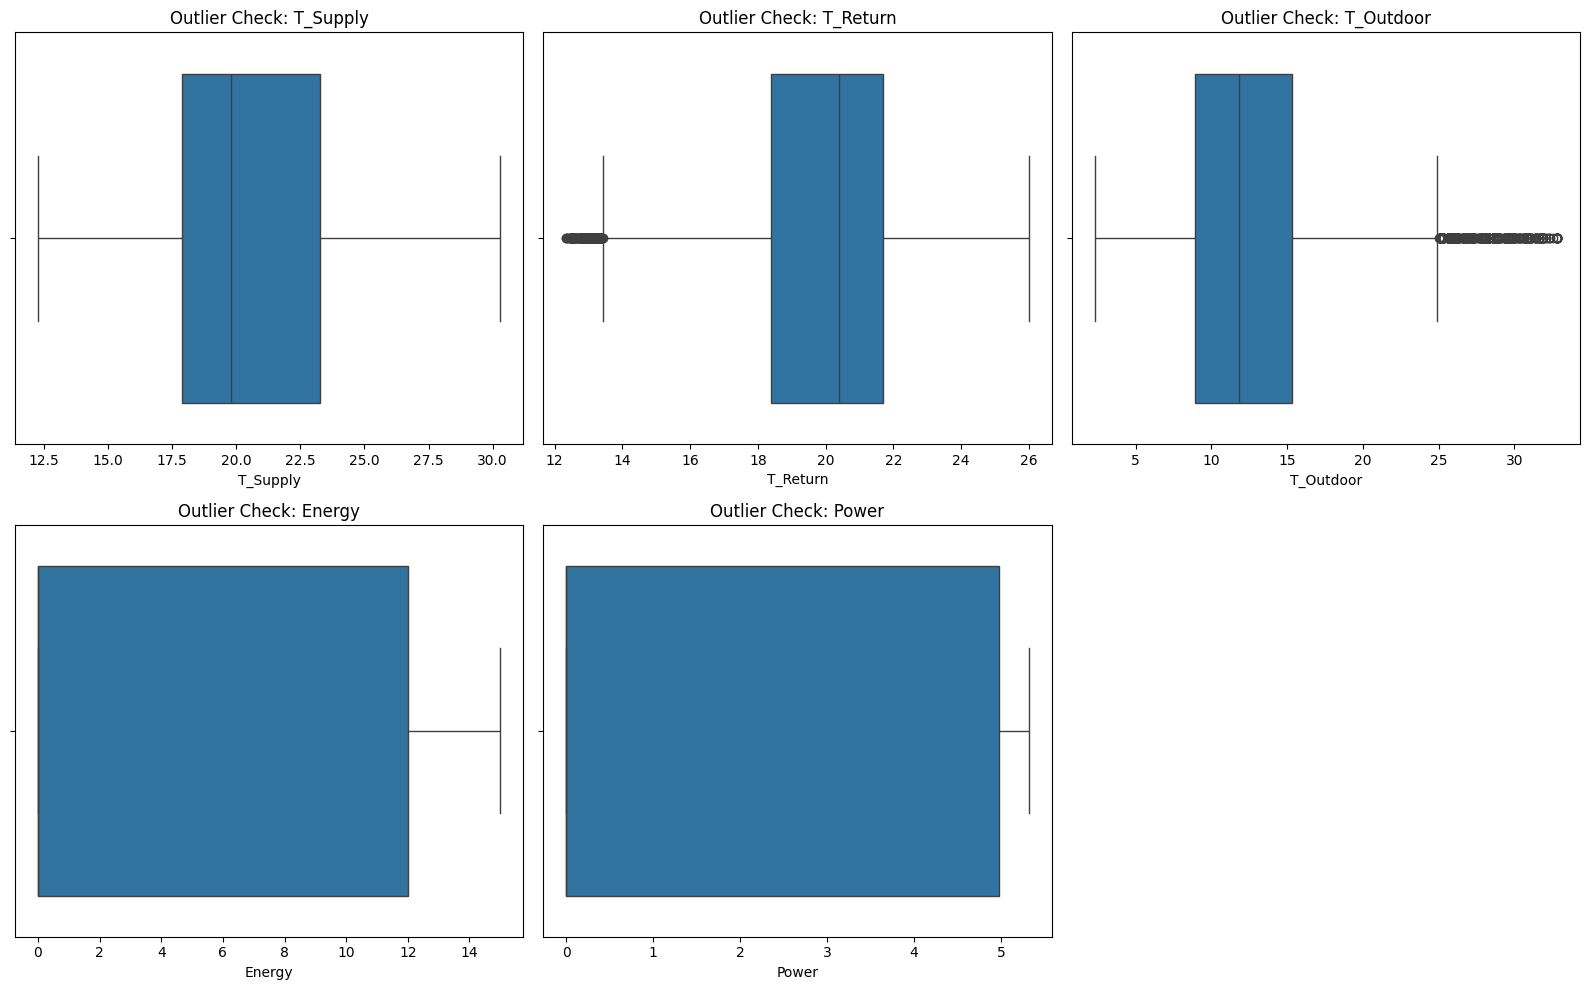

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up layout
plt.figure(figsize=(16, 10))

# Example: Boxplots for main metrics
cols_to_plot = ['T_Supply', 'T_Return', 'T_Outdoor', 'Energy', 'Power']

for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")

plt.tight_layout()
plt.show()


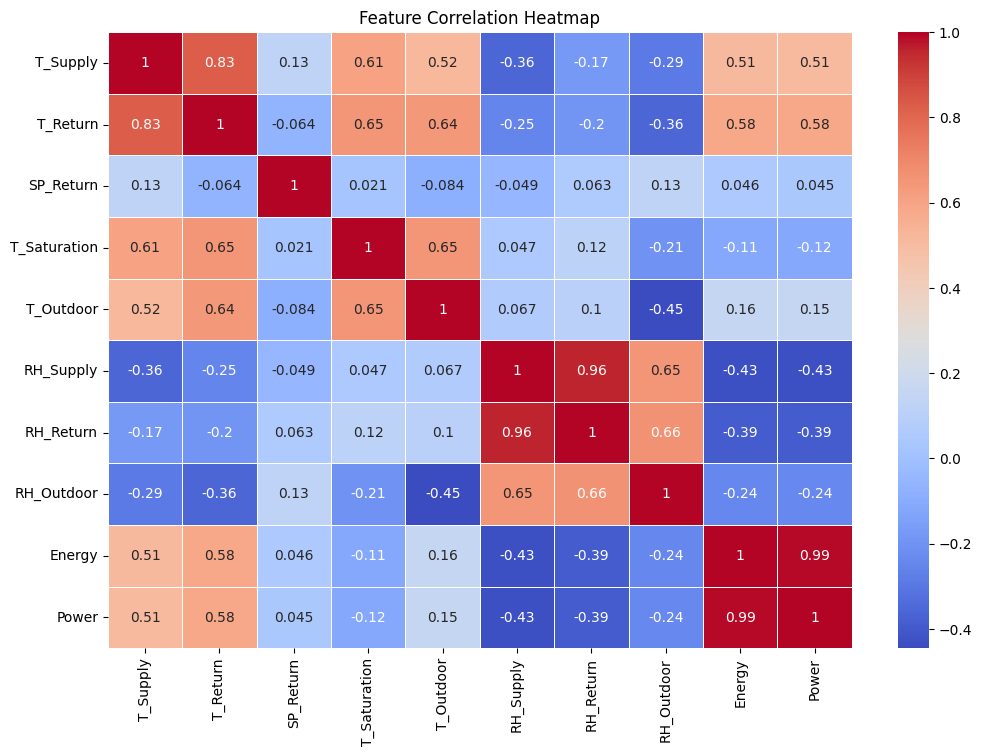

In [19]:
# Correlation heatmap of all numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


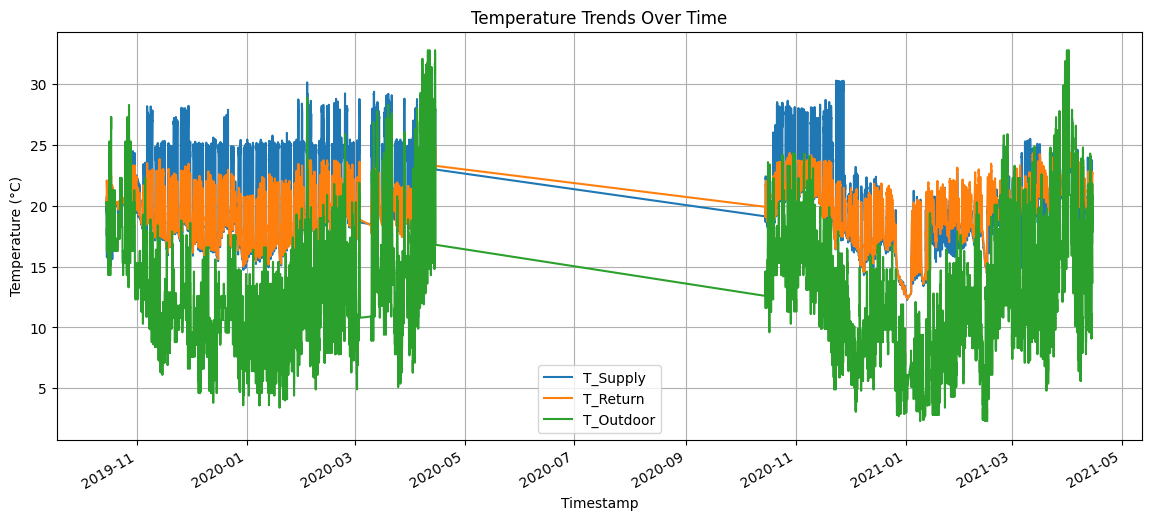

In [24]:
# Ensure Timestamp index is in datetime format and utc
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], utc=True)
    df.set_index('Timestamp', inplace=True)
else:
    df.index = pd.to_datetime(df.index, utc=True)

# Now plot
import matplotlib.pyplot as plt

df[['T_Supply', 'T_Return', 'T_Outdoor']].plot(figsize=(14, 6))
plt.title('Temperature Trends Over Time')
plt.ylabel('Temperature (°C)')
plt.xlabel('Timestamp')
plt.grid(True)
plt.show()


In [21]:
print(df.columns.tolist())


['T_Supply', 'T_Return', 'SP_Return', 'T_Saturation', 'T_Outdoor', 'RH_Supply', 'RH_Return', 'RH_Outdoor', 'Energy', 'Power']


In [22]:
print(df.isnull().sum())


T_Supply        0
T_Return        0
SP_Return       0
T_Saturation    0
T_Outdoor       0
RH_Supply       0
RH_Return       0
RH_Outdoor      0
Energy          0
Power           0
dtype: int64


In [25]:
#  Try forward fill or interpolation for time-series
df.interpolate(method='time', inplace=True)


In [26]:
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Weekday'] = df.index.weekday
df['Month'] = df.index.month
df['Is_Weekend'] = df['Weekday'].isin([5,6]).astype(int)


In [27]:
df['Delta_T'] = df['T_Supply'] - df['T_Return']
df['T_Diff_Outdoor'] = df['T_Supply'] - df['T_Outdoor']


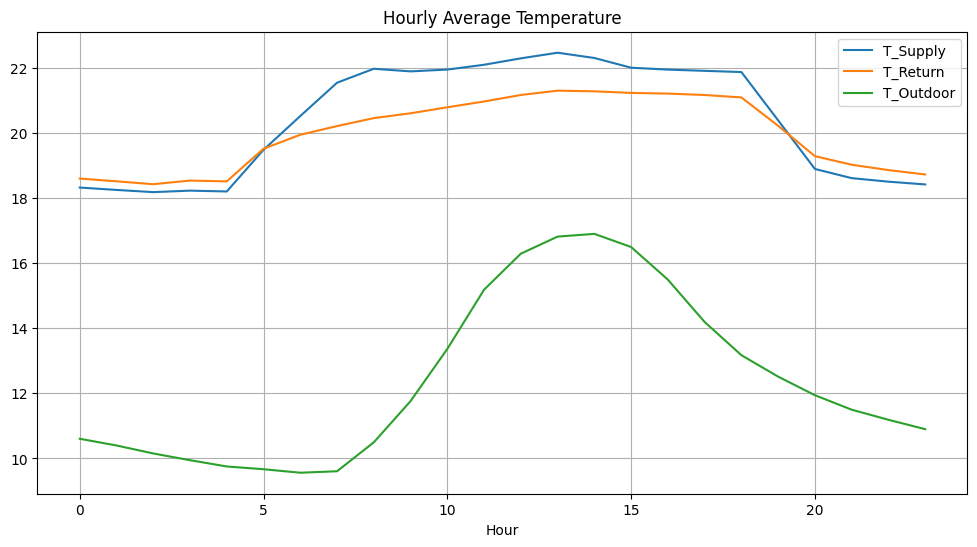

In [28]:
# Hourly trend
df.groupby('Hour')[['T_Supply', 'T_Return', 'T_Outdoor']].mean().plot(figsize=(12,6))
plt.title('Hourly Average Temperature')
plt.grid(True)
plt.show()


In [29]:
# Rule-based anomaly flags
df['Anomaly_T_Supply'] = (df['T_Supply'] > 25).astype(int)
df['Anomaly_Delta_T'] = (df['Delta_T'].abs() > 2).astype(int)

# Total anomaly flag
df['Anomaly'] = ((df['Anomaly_T_Supply'] == 1) | (df['Anomaly_Delta_T'] == 1)).astype(int)

# Show anomaly summary
print("Total anomalies detected:", df['Anomaly'].sum())


Total anomalies detected: 9886


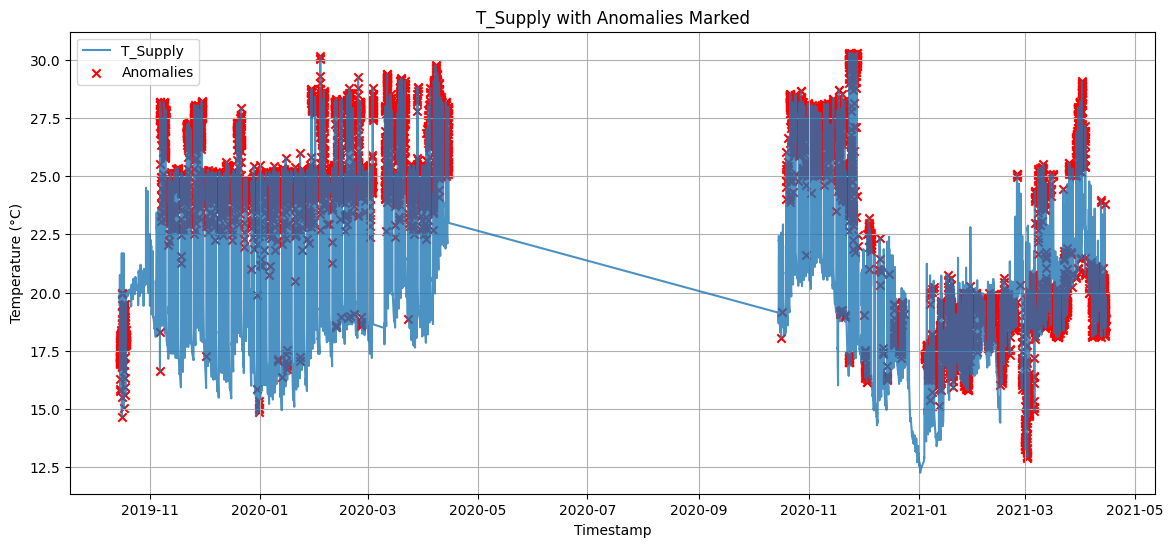

In [30]:
# Plot with anomalies marked
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['T_Supply'], label='T_Supply', alpha=0.8)
plt.scatter(df[df['Anomaly'] == 1].index, df[df['Anomaly'] == 1]['T_Supply'], color='red', label='Anomalies', marker='x')
plt.title('T_Supply with Anomalies Marked')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Display periods with anomalies
anomalies = df[df['Anomaly'] == 1][['T_Supply', 'T_Return', 'Delta_T']]
print("Anomaly samples:\n", anomalies.head())


Anomaly samples:
                             T_Supply   T_Return   Delta_T
Timestamp                                                
2019-10-15 05:30:00+00:00  18.070000  22.010000 -3.940000
2019-10-15 05:45:00+00:00  17.529999  21.885000 -4.355001
2019-10-15 06:00:00+00:00  17.744999  21.764999 -4.020000
2019-10-15 06:15:00+00:00  17.984999  21.715000 -3.730001
2019-10-15 06:30:00+00:00  17.789999  21.684999 -3.895000


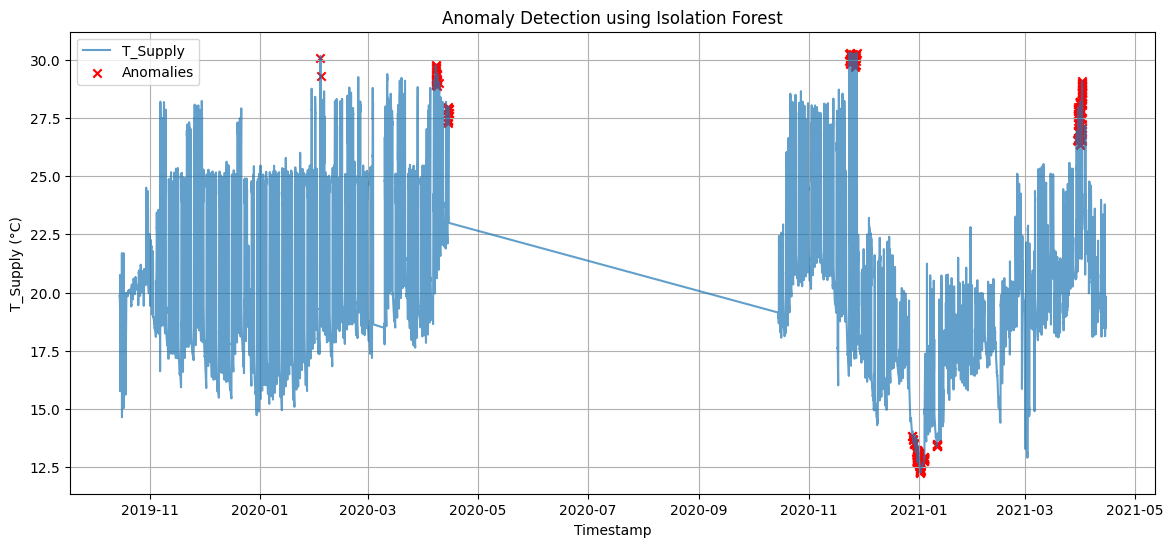

In [32]:
# Step 4: Anomaly Detection using Isolation Forest

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select features for anomaly detection
features = ['T_Supply', 'T_Return', 'T_Outdoor']
df_clean = df[features].dropna()  # Drop rows with missing values

# Scale features for ML model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Initialize and fit Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_clean['anomaly'] = model.fit_predict(X_scaled)

# Map -1 to anomaly, 1 to normal
df_clean['anomaly'] = df_clean['anomaly'].map({1: 0, -1: 1})

# Merge anomaly label back to original df (optional, aligns by timestamp)
df['anomaly'] = df_clean['anomaly']

# Plot the anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_clean.index, df_clean['T_Supply'], label='T_Supply', alpha=0.7)
plt.scatter(df_clean[df_clean['anomaly'] == 1].index, df_clean[df_clean['anomaly'] == 1]['T_Supply'],
            color='red', label='Anomalies', marker='x')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Timestamp')
plt.ylabel('T_Supply (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# Step 5: Summarize Anomalies

# Total number of anomalies
total_anomalies = df['anomaly'].sum()
print(f"Total anomalies detected: {total_anomalies}")

# Display first few anomaly timestamps
anomaly_times = df[df['anomaly'] == 1].index
print("\nSample anomaly timestamps:")
print(anomaly_times[:10])

# Average temp during anomalies vs. normal
anomaly_stats = df[df['anomaly'] == 1][['T_Supply', 'T_Return', 'T_Outdoor']].mean()
normal_stats = df[df['anomaly'] == 0][['T_Supply', 'T_Return', 'T_Outdoor']].mean()

print("\nAverage values during anomalies:")
print(anomaly_stats)

print("\nAverage values during normal periods:")
print(normal_stats)

# % of data flagged as anomaly
percentage = (total_anomalies / len(df.dropna())) * 100
print(f"\nPercentage of data flagged as anomaly: {percentage:.2f}%")


Total anomalies detected: 339

Sample anomaly timestamps:
DatetimeIndex(['2020-02-03 14:00:00+00:00', '2020-02-03 14:15:00+00:00',
               '2020-04-07 12:45:00+00:00', '2020-04-07 13:00:00+00:00',
               '2020-04-07 13:15:00+00:00', '2020-04-07 13:30:00+00:00',
               '2020-04-07 13:45:00+00:00', '2020-04-07 14:00:00+00:00',
               '2020-04-07 14:15:00+00:00', '2020-04-07 14:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Timestamp', freq=None)

Average values during anomalies:
T_Supply     19.192684
T_Return     17.238045
T_Outdoor    14.036578
dtype: float64

Average values during normal periods:
T_Supply     20.449509
T_Return     20.022277
T_Outdoor    12.397770
dtype: float64

Percentage of data flagged as anomaly: 1.00%


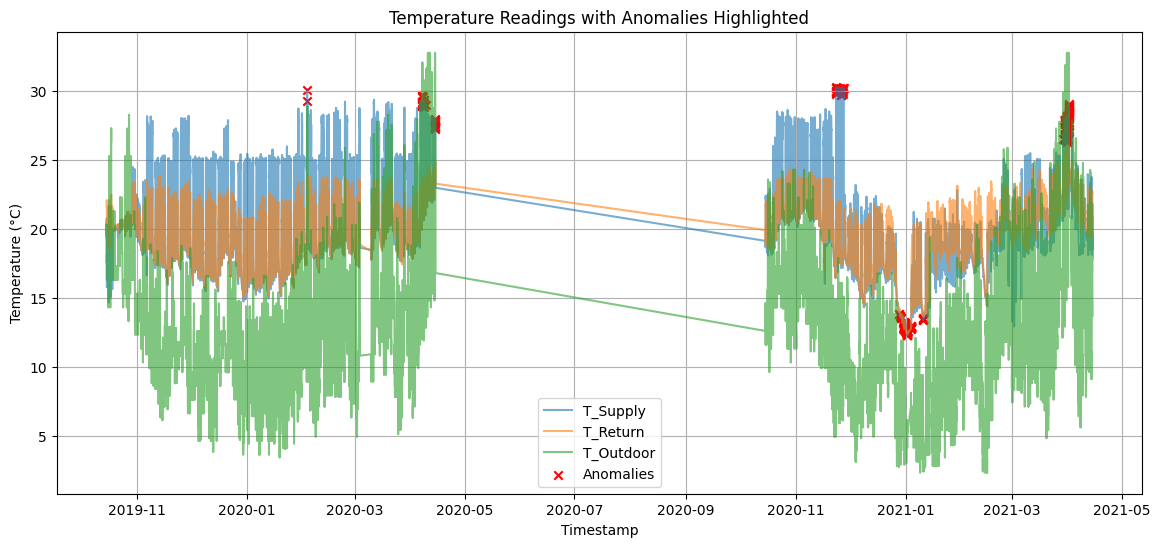

In [34]:
# Highlight anomaly periods on all three sensors
plt.figure(figsize=(14, 6))
for col in ['T_Supply', 'T_Return', 'T_Outdoor']:
    plt.plot(df.index, df[col], label=col, alpha=0.6)

# Mark anomalies
anomalies = df[df['anomaly'] == 1]
plt.scatter(anomalies.index, anomalies['T_Supply'], color='red', label='Anomalies', marker='x')

plt.title("Temperature Readings with Anomalies Highlighted")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
# Assuming you created a dataframe named df_prophet with 'ds' and 'y' columns

df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

# Now fit the model
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)


13:27:33 - cmdstanpy - INFO - Chain [1] start processing
13:27:50 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)


13:37:48 - cmdstanpy - INFO - Chain [1] start processing
13:38:03 - cmdstanpy - INFO - Chain [1] done processing
D:\HVAC Anomaly Detection\venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


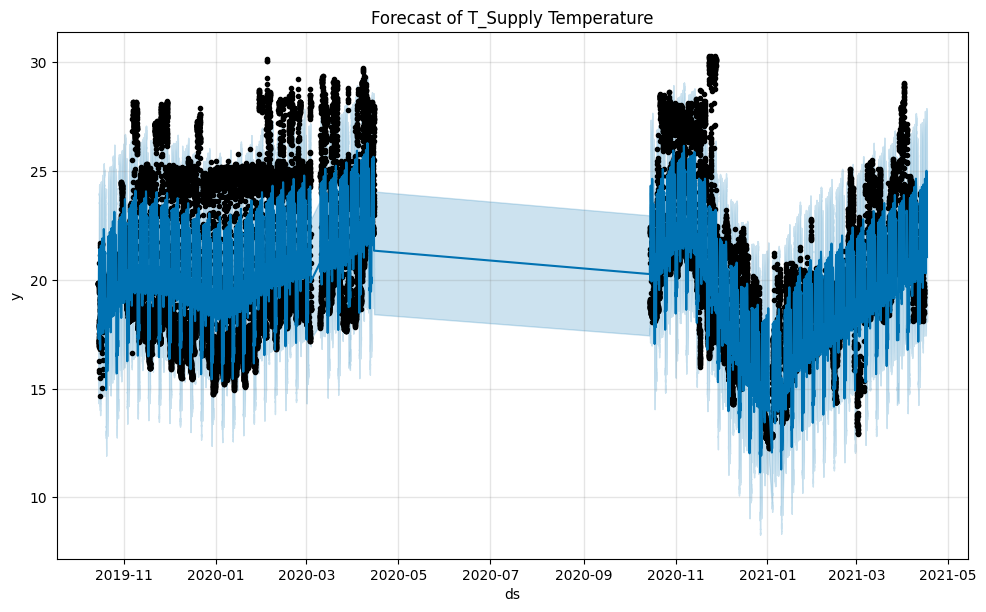

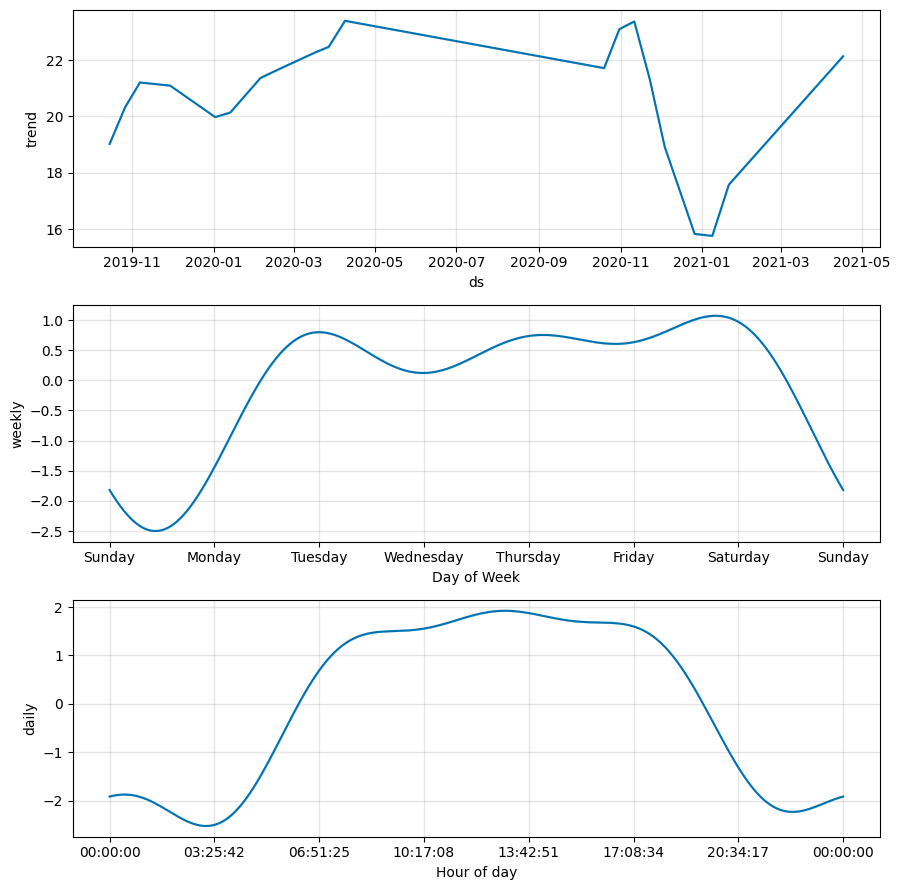

In [41]:
# Prepare data for Prophet
df_prophet = df[['T_Supply']].reset_index().rename(columns={'Timestamp': 'ds', 'T_Supply': 'y'})

# Remove timezone
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

# Drop NaNs just in case
df_prophet.dropna(inplace=True)

# Initialize and fit model
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)

# Future dataframe (e.g., next 48 hours at same freq)
future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Forecast of T_Supply Temperature")
plt.show()

# Optional: Plot components (trend, seasonality)
model.plot_components(forecast)
plt.show()


In [42]:
# Merge actuals into forecast dataframe
df_merged = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(
    df_prophet, on='ds', how='left'
)

# Detect anomalies
df_merged['anomaly'] = 0
df_merged.loc[df_merged['y'] > df_merged['yhat_upper'], 'anomaly'] = 1   # Positive anomaly
df_merged.loc[df_merged['y'] < df_merged['yhat_lower'], 'anomaly'] = -1  # Negative anomaly

# View anomalies
anomalies = df_merged[df_merged['anomaly'] != 0]
print(anomalies[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper', 'anomaly']])


                       ds          y       yhat  yhat_lower  yhat_upper  \
37    2019-10-15 07:15:00  15.764999  20.695795   17.943543   23.465668   
38    2019-10-15 07:30:00  15.870000  20.838383   18.171474   23.584306   
39    2019-10-15 07:45:00  16.295000  20.948392   18.067439   23.518876   
40    2019-10-15 08:00:00  17.355000  21.028184   18.434873   23.757880   
41    2019-10-15 08:15:00  17.885000  21.081404   18.256994   23.965110   
...                   ...        ...        ...         ...         ...   
33875 2021-04-14 18:45:00  18.840000  23.370849   20.887629   26.160885   
33876 2021-04-14 19:00:00  18.555000  23.130369   20.330373   25.852909   
33877 2021-04-14 19:15:00  18.885000  22.867771   19.917654   25.433444   
33878 2021-04-14 19:30:00  19.195000  22.589260   19.844977   25.423977   
33879 2021-04-14 19:45:00  19.344999  22.302130   19.632274   25.010347   

       anomaly  
37          -1  
38          -1  
39          -1  
40          -1  
41          -1

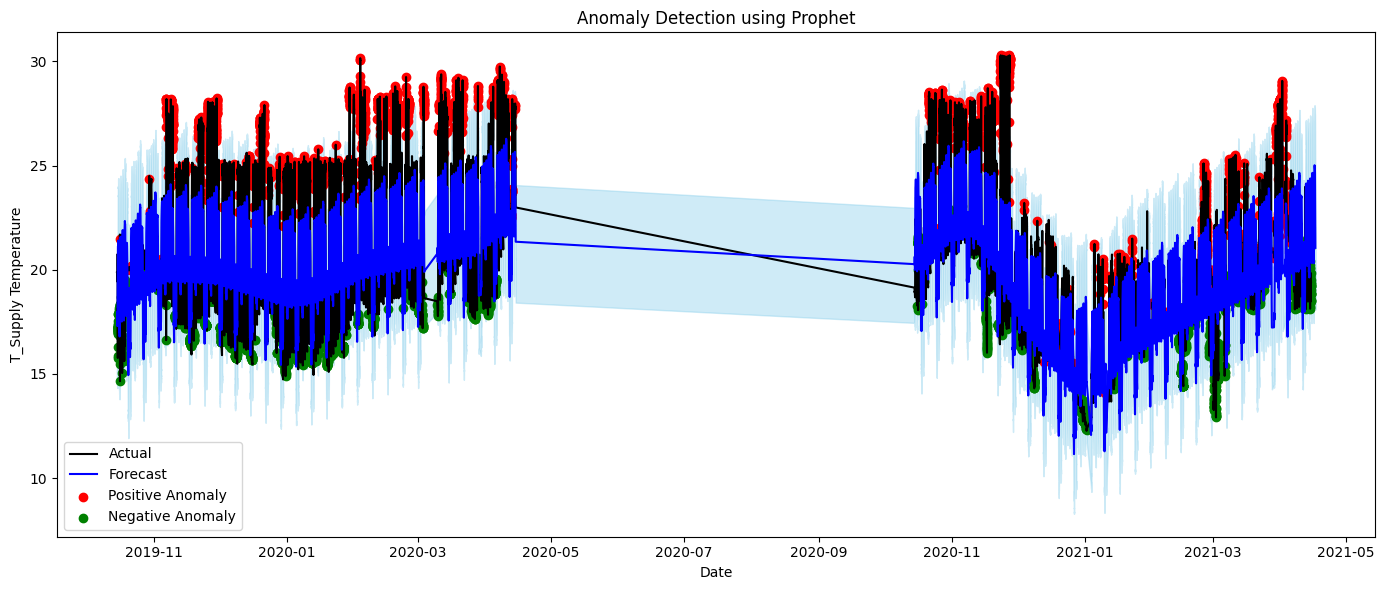

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_merged['ds'], df_merged['y'], label='Actual', color='black')
plt.plot(df_merged['ds'], df_merged['yhat'], label='Forecast', color='blue')
plt.fill_between(df_merged['ds'], df_merged['yhat_lower'], df_merged['yhat_upper'], color='skyblue', alpha=0.4)

# Plot anomalies
plt.scatter(df_merged[df_merged['anomaly'] == 1]['ds'],
            df_merged[df_merged['anomaly'] == 1]['y'],
            color='red', label='Positive Anomaly')

plt.scatter(df_merged[df_merged['anomaly'] == -1]['ds'],
            df_merged[df_merged['anomaly'] == -1]['y'],
            color='green', label='Negative Anomaly')

plt.legend()
plt.title("Anomaly Detection using Prophet")
plt.xlabel("Date")
plt.ylabel("T_Supply Temperature")
plt.tight_layout()
plt.show()


In [44]:
# Check for today's anomalies
from datetime import datetime
today = pd.to_datetime(datetime.today().date())

today_anomalies = df_merged[(df_merged['ds'].dt.date == today.date()) & (df_merged['anomaly'] != 0)]

if not today_anomalies.empty:
    print("🚨 Alert: Anomaly detected today!")
    print(today_anomalies[['ds', 'y', 'yhat', 'anomaly']])
else:
    print("✅ No anomaly detected today.")


✅ No anomaly detected today.


In [45]:
# Export only anomalies (excluding normal points)
anomaly_output = df_merged[df_merged['anomaly'] != 0]

# Save to CSV
anomaly_output.to_csv("anomalies_detected.csv", index=False)

print("📁 Anomalies exported to anomalies_detected.csv")


📁 Anomalies exported to anomalies_detected.csv
